In [1]:
import pandas as pd
import numpy as np

In [68]:
TrainUrl = "../titanic/train.csv"
TestUrl = "../titanic/test.csv"

In [69]:
TrainDf = pd.read_csv(TrainUrl)
TestDf = pd.read_csv(TestUrl)

In [159]:
TrainAge = TrainDf["Age"].fillna(TrainDf["Age"].median())
TestAge = TestDf["Age"].fillna(TrainDf["Age"].median())

In [160]:
label = TrainDf.loc[:,["Survived"]].values

In [161]:
TrainAge = TrainAge.values.reshape(-1, 1)
label = label.reshape(-1,1)
TestAge = TestAge.values.reshape(-1,1)

In [163]:
lr_model = LogisticRegression()
lr_model.fit(TrainAge,label)

/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
p_pre = lr_model.predict(TestAge)
p_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [165]:
id_test = TestDf["PassengerId"]

In [166]:
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(p_pre, id_test, columns = ["Survived"])
# my_tree_one.csvとして書き出し
my_solution.to_csv("LRAM_noPreprocessing.csv", index_label = ["PassengerId"])

In [117]:
TrainDf['Gender'] =TrainDf['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [8]:
TrainDf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [134]:
TrainAgeMedian = TrainDf["Age"].fillna(TrainDf["Age"].median())
TrainDf["AgeMedia"] = TrainDf["Age"].fillna(TrainDf["Age"].median())

In [135]:
TrainAgeMean = TrainDf["Age"].fillna(TrainDf["Age"].mean())
TrainDf["AgeMedia"] = TrainDf["Age"].fillna(TrainDf["Age"].mean())

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [15]:
label = TrainDf.loc[:,["Survived"]].values

In [97]:
TrainAgeMedian = TrainDf["Age"].fillna(TrainDf["Age"].median())
TrainAgeMean = TrainDf["Age"].fillna(TrainDf["Age"].mean())
TestAgeMedian = TestDf["Age"].fillna(TestDf["Age"].median())
TestAgeMean = TestDf["Age"].fillna(TestDf["Age"].mean())

In [98]:
def Preprocessing(TrainAgeMedian):
    for i,age in enumerate(TrainAgeMedian):
        #print(age)
        if age < 10:
            TrainAgeMedian[i] = np.float64(0)
        elif age < 20:
            TrainAgeMedian[i] = np.float64(1)
        elif age < 30:
            TrainAgeMedian[i] = np.float64(2)
        elif age < 40:
            TrainAgeMedian[i] = np.float64(3)
        else:
            TrainAgeMedian[i] = np.float64(4)
    return TrainAgeMedian

In [99]:
TrainAgeMedian = Preprocessing(TrainAgeMedian)
TestAgeMedian =  Preprocessing(TestAgeMedian)

In [105]:
import sklearn.preprocessing as sp

In [106]:
enc = sp.OneHotEncoder( categories='auto', sparse=False )

In [107]:
TrainAgeMedian = enc.fit_transform(TrainAgeMedian)

In [168]:
type(TrainAgeMedian)

pandas.core.series.Series

In [109]:
TestAgeMedian = enc.fit_transform(TestAgeMedian)

In [110]:
TestAgeMedian

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [145]:
TrainDf.drop(["PassengerId",
             "Survived",
             "Pclass",
             "Name",
             "Sex",
             "SibSp",
             "Parch",
             "Ticket",
             "Fare",
             "Cabin",
             "Embarked"]
             ,axis='columns').head()

,Age,AgeMedia
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0


In [70]:
TrainDf.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [111]:
TrainAgeMedian = TrainAgeMedian.values.reshape(-1, 1)
label = label.reshape(-1,1)
TestAgeMedian = TestAgeMedian.values.reshape(-1,1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [112]:
lr_model = LogisticRegression()
lr_model.fit(TrainAgeMedian,label)

/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
p_pre = lr_model.predict(TestAgeMedian)
p_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [147]:
id_test = TestDf["PassengerId"]

In [148]:
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(p_pre, id_test, columns = ["Survived"])
# my_tree_one.csvとして書き出し
my_solution.to_csv("LogisticRegression_AgeMedian.csv", index_label = ["PassengerId"])

In [3]:
from sklearn.metrics import confusion_matrix
trueDf = pd.read_csv("../titanic/gender_submission.csv")
preDf = pd.read_csv("./LogisticRegression_AgeMedian.csv")

In [4]:
trueSurvived = trueDf["Survived"]
preSurvived = preDf["Survived"]
confusion_matrix(trueSurvived,preSurvived)

array([[255,  11],
       [143,   9]])

## データを相関係数

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [14]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


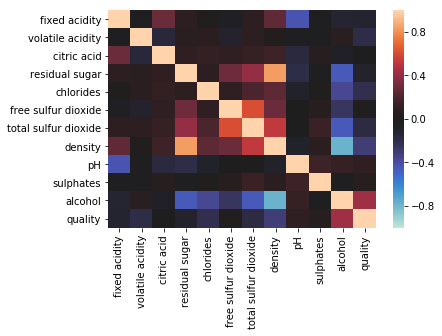

In [15]:
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0)

## データ情報

In [22]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


## 前処理なしのロジスティック回帰による分類

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [10]:
WineDataUrl = "../winequality-white.csv" 
df = pd.read_csv(WineDataUrl, sep=';')

ここで、教師データとなる``quality``を抜き取る

In [30]:
TestData = df["quality"]
df1 = df.drop('quality', axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df1, TestData, test_size=0.3, random_state=42)

ここでは、``アルコール``だけの特徴で機械学習をする

In [32]:
X_trainAl = X_train["alcohol"]
X_testAl = X_test["alcohol"]

In [33]:
X_trainAl = X_trainAl.values.reshape(-1, 1)
y_tain = y_train.values.reshape(-1,1)
X_testAl = X_testAl.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1,1)

In [34]:
rfc = RandomForestClassifier(n_jobs=-1,random_state=2525)
rfc.fit(X_trainAl,y_train)

/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=2525, verbose=0,
                       warm_start=False)

In [35]:
PredictedLabels = rfc.predict(X_testAl)
PredictedLabels

array([7, 7, 6, ..., 6, 7, 6])

In [36]:
rfc.score(X_testAl, y_test)

0.5020408163265306

ここでは、``pH``だけの特徴で機械学習をする

In [37]:
X_trainph = X_train["pH"]
X_testph = X_test["pH"]

In [39]:
X_trainPh = X_trainph.values.reshape(-1, 1)
y_tain = y_train.values.reshape(-1,1)
X_testPh = X_testph.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1,1)

In [40]:
rfc = RandomForestClassifier(n_jobs=-1,random_state=2525)
rfc.fit(X_trainPh,y_train)

/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=2525, verbose=0,
                       warm_start=False)

In [41]:
PredictedLabels = rfc.predict(X_testPh)
PredictedLabels

array([5, 6, 6, ..., 6, 6, 7])

In [42]:
rfc.score(X_testPh, y_test)

0.427891156462585

## 前処理ありのロジスティック回帰

まずは、相関の強い``アルコール``と``ph``を``主成分分析``を行う